In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('bank_sim.csv')
df.head()



,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [3]:
df.isna().any()

step           False
customer       False
age            False
gender         False
zipcodeOri     False
merchant       False
zipMerchant    False
category       False
amount         False
fraud          False
dtype: bool

In [4]:
column_change = [c for c in df.columns if c not in ['step', 'amount', 'fraud']]
column_change

['customer',
 'age',
 'gender',
 'zipcodeOri',
 'merchant',
 'zipMerchant',
 'category']

In [5]:
df[column_change] = df[column_change].replace("'", "", regex=True)

In [6]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


In [7]:
df.nunique()

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64

In [8]:
df = df.drop(['zipcodeOri','zipMerchant'], axis = 1)
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0


In [9]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

In [10]:
df_fraud.head()

,step,customer,age,gender,merchant,category,amount,fraud
88,0,C583110837,3,M,M480139044,es_health,44.26,1
89,0,C1332295774,3,M,M480139044,es_health,324.50,1
434,0,C1160421902,3,M,M857378720,es_hotelservices,176.32,1
435,0,C966214713,3,M,M857378720,es_hotelservices,337.41,1
553,0,C1450140987,4,F,M1198415165,es_wellnessandbeauty,220.11,1


In [11]:
df_non_fraud.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0


In [12]:
def edaplot(data: pd.DataFrame, col: str, title: str = None, hue: str = None, legend: bool = True):
    plt.figure(figsize=(17, 14))
    plt.title(title)
    ax = sns.countplot(
        data=data,
        x=col,
        palette='tab10',
        order=data[col].value_counts().index,
        hue=hue if hue else None
    )

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(data[col]), 2)}%",
                ha='center', va='bottom')

    if data[col].nunique() > 5:
        plt.xticks(rotation=45)

    if legend:
        ax.legend(title=hue)

    plt.show()

C:\Users\anish\AppData\Local\Temp\ipykernel_24168\32945717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\anish\AppData\Local\Temp\ipykernel_24168\32945717.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=hue)


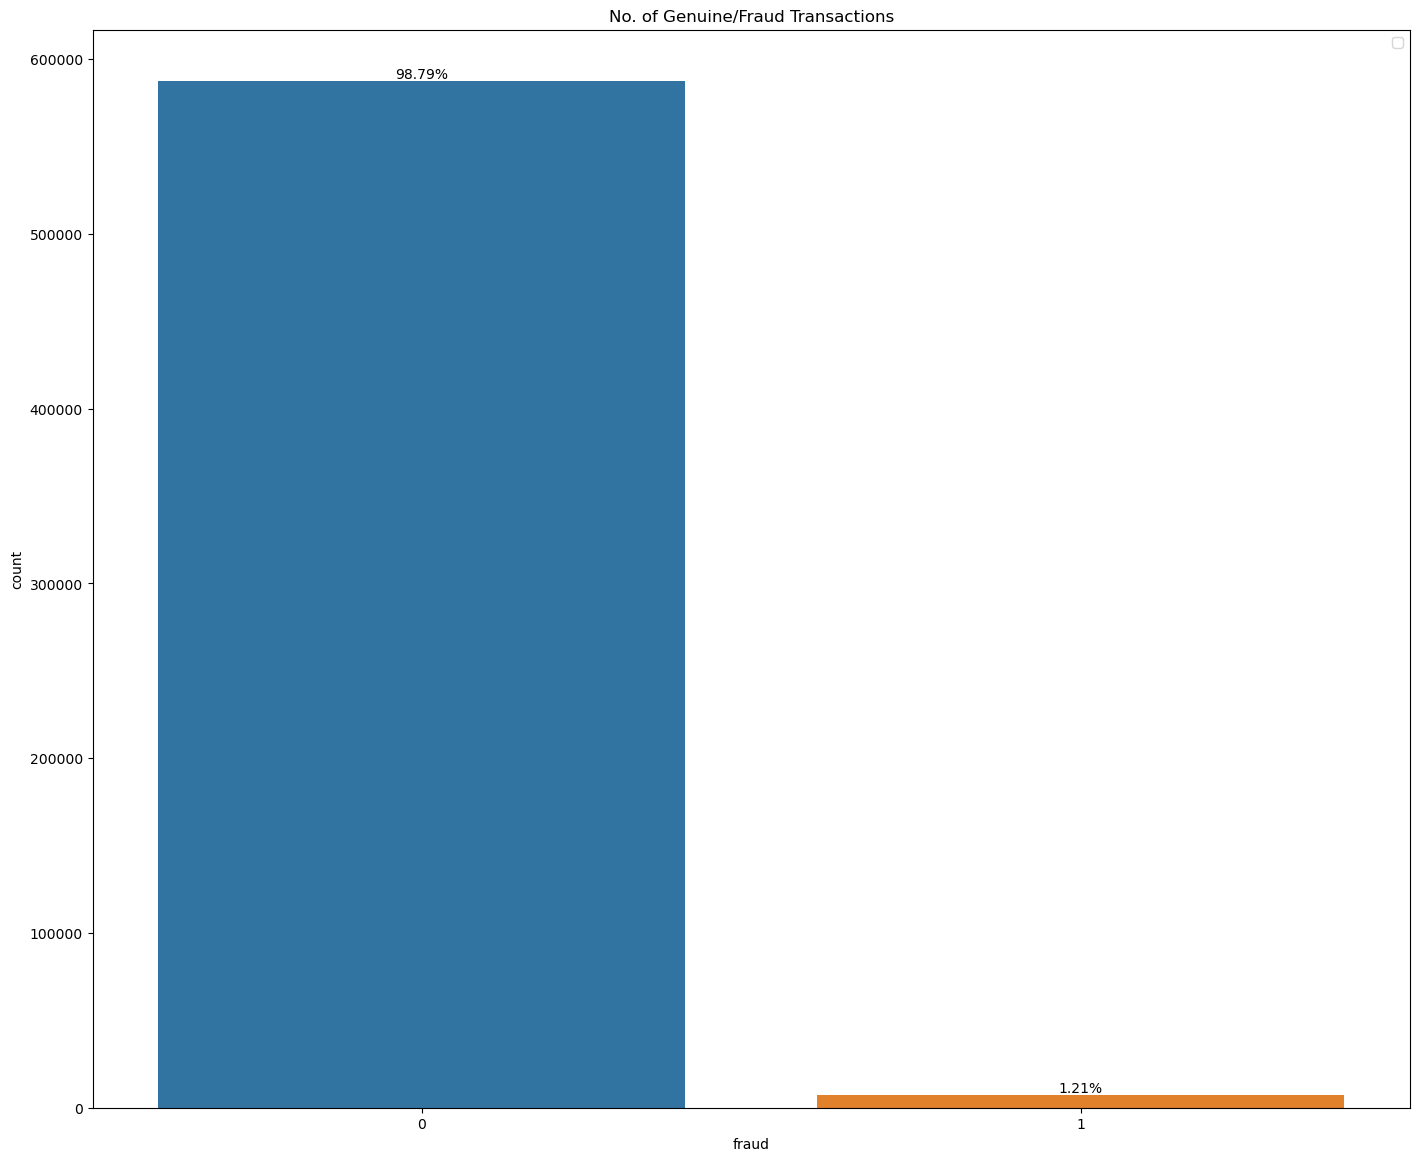

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

edaplot(df, 'fraud', title = 'No. of Genuine/Fraud Transactions', legend=True)

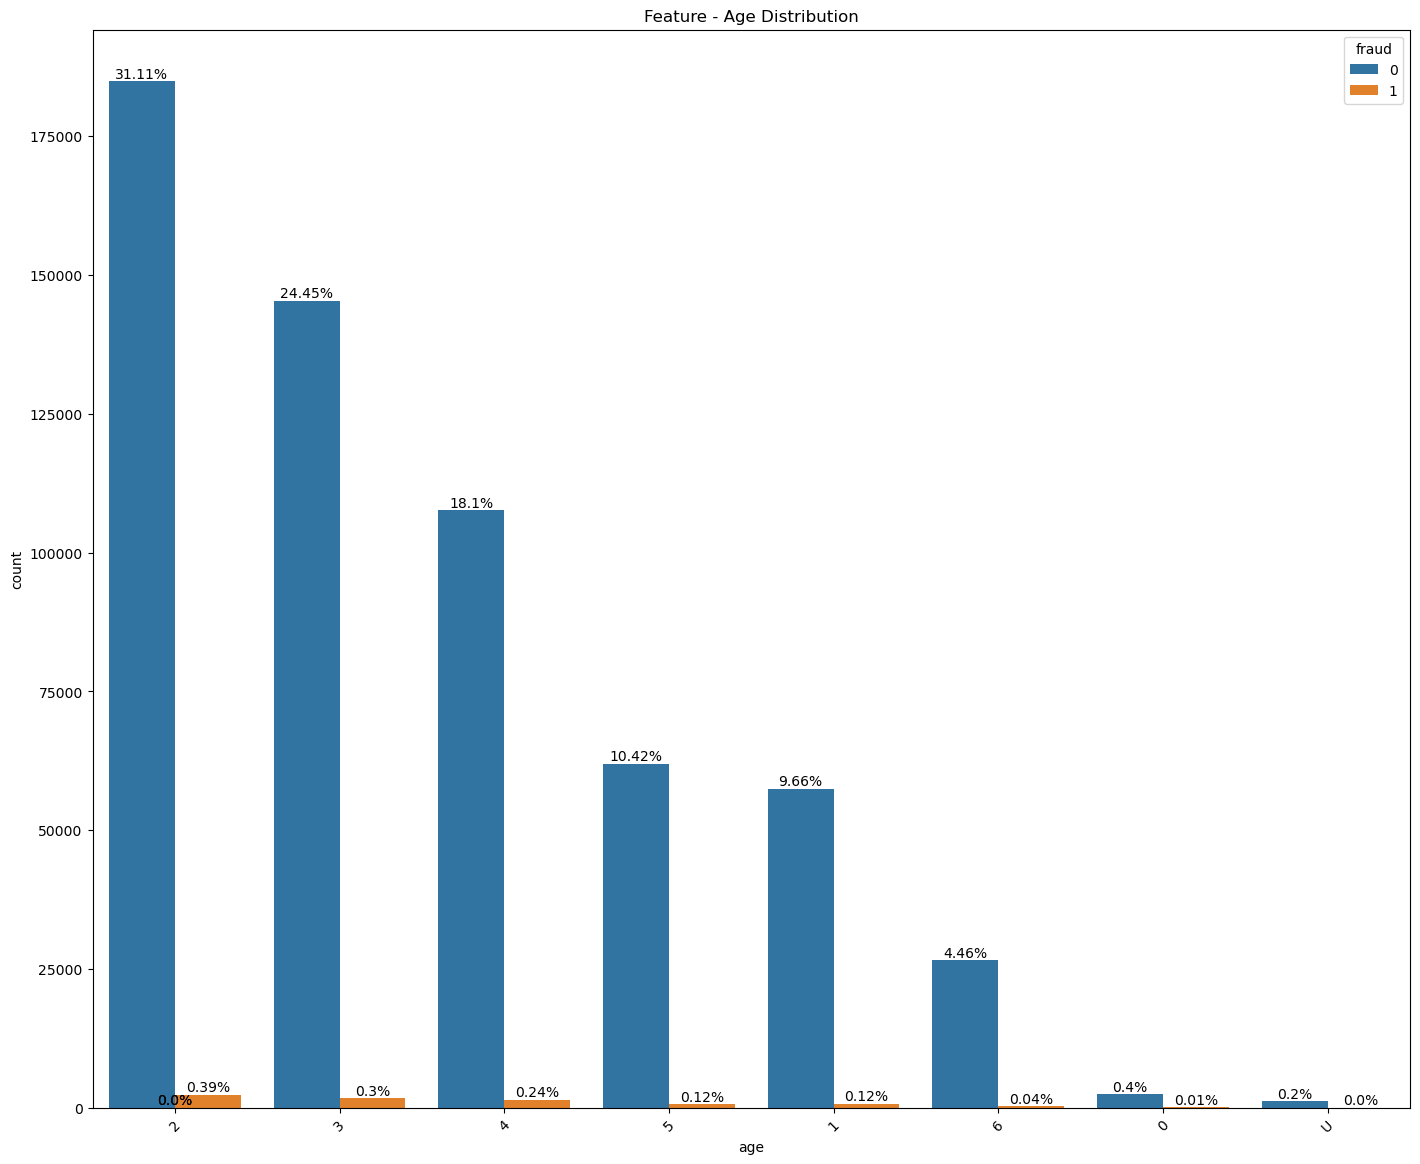

In [14]:
edaplot(df, 'age', title = 'Feature - Age Distribution', hue = 'fraud')

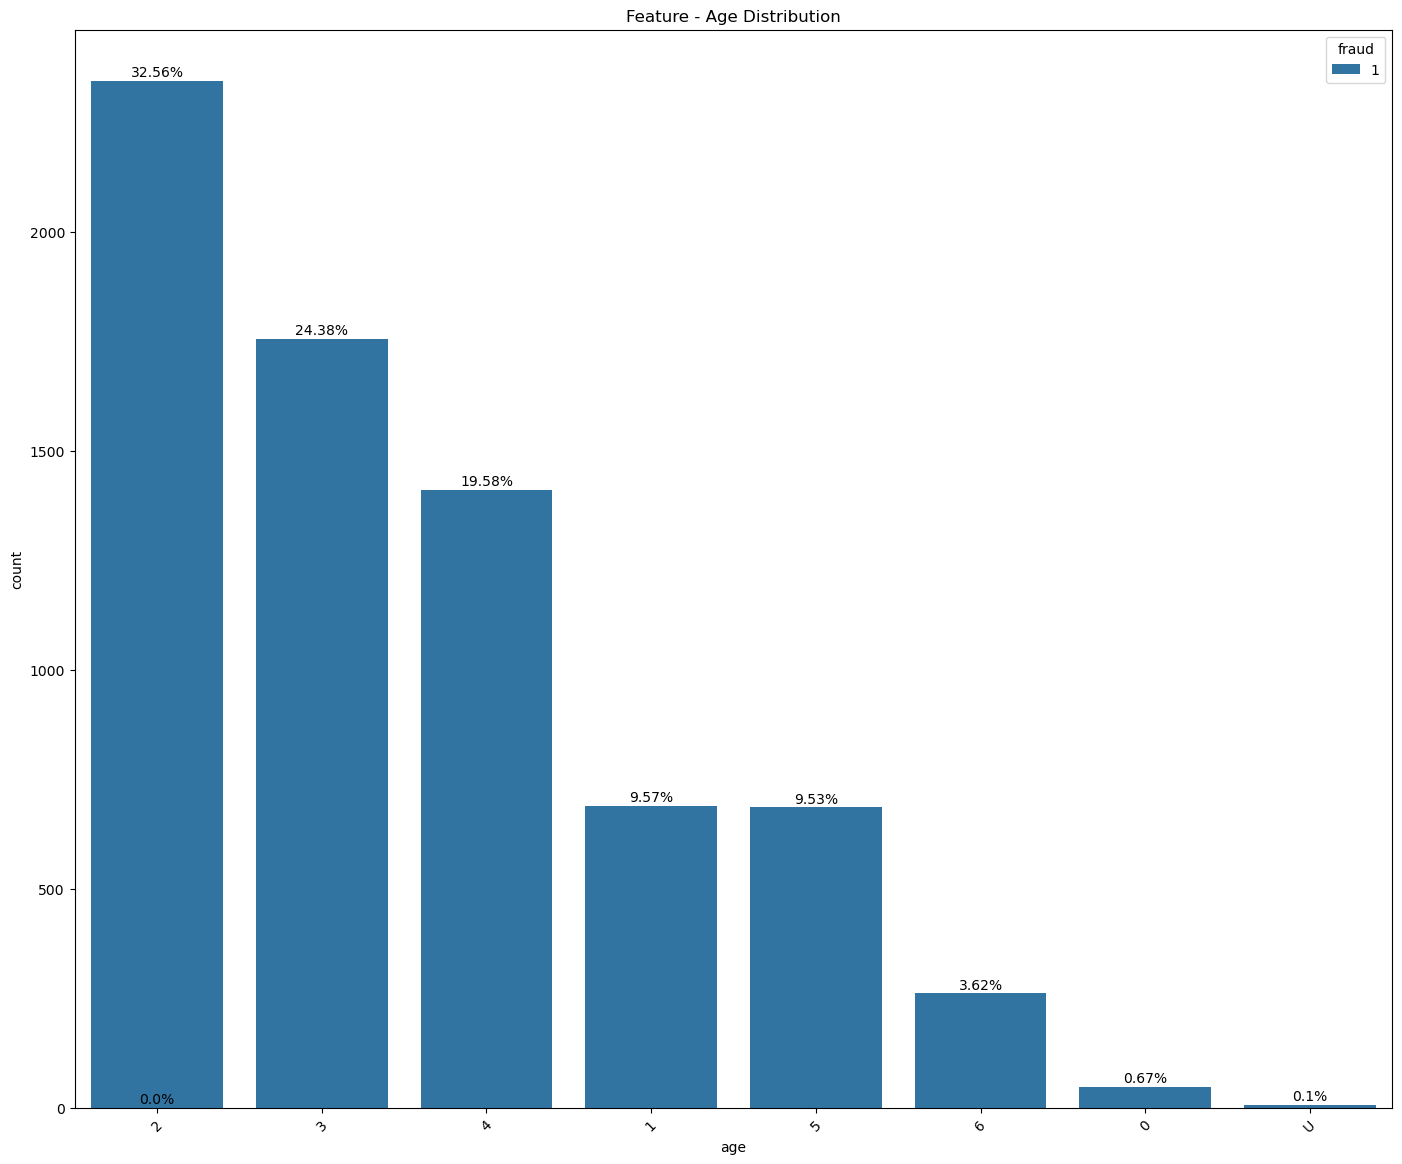

In [15]:
edaplot(df_fraud, 'age', title = 'Feature - Age Distribution', hue = 'fraud')

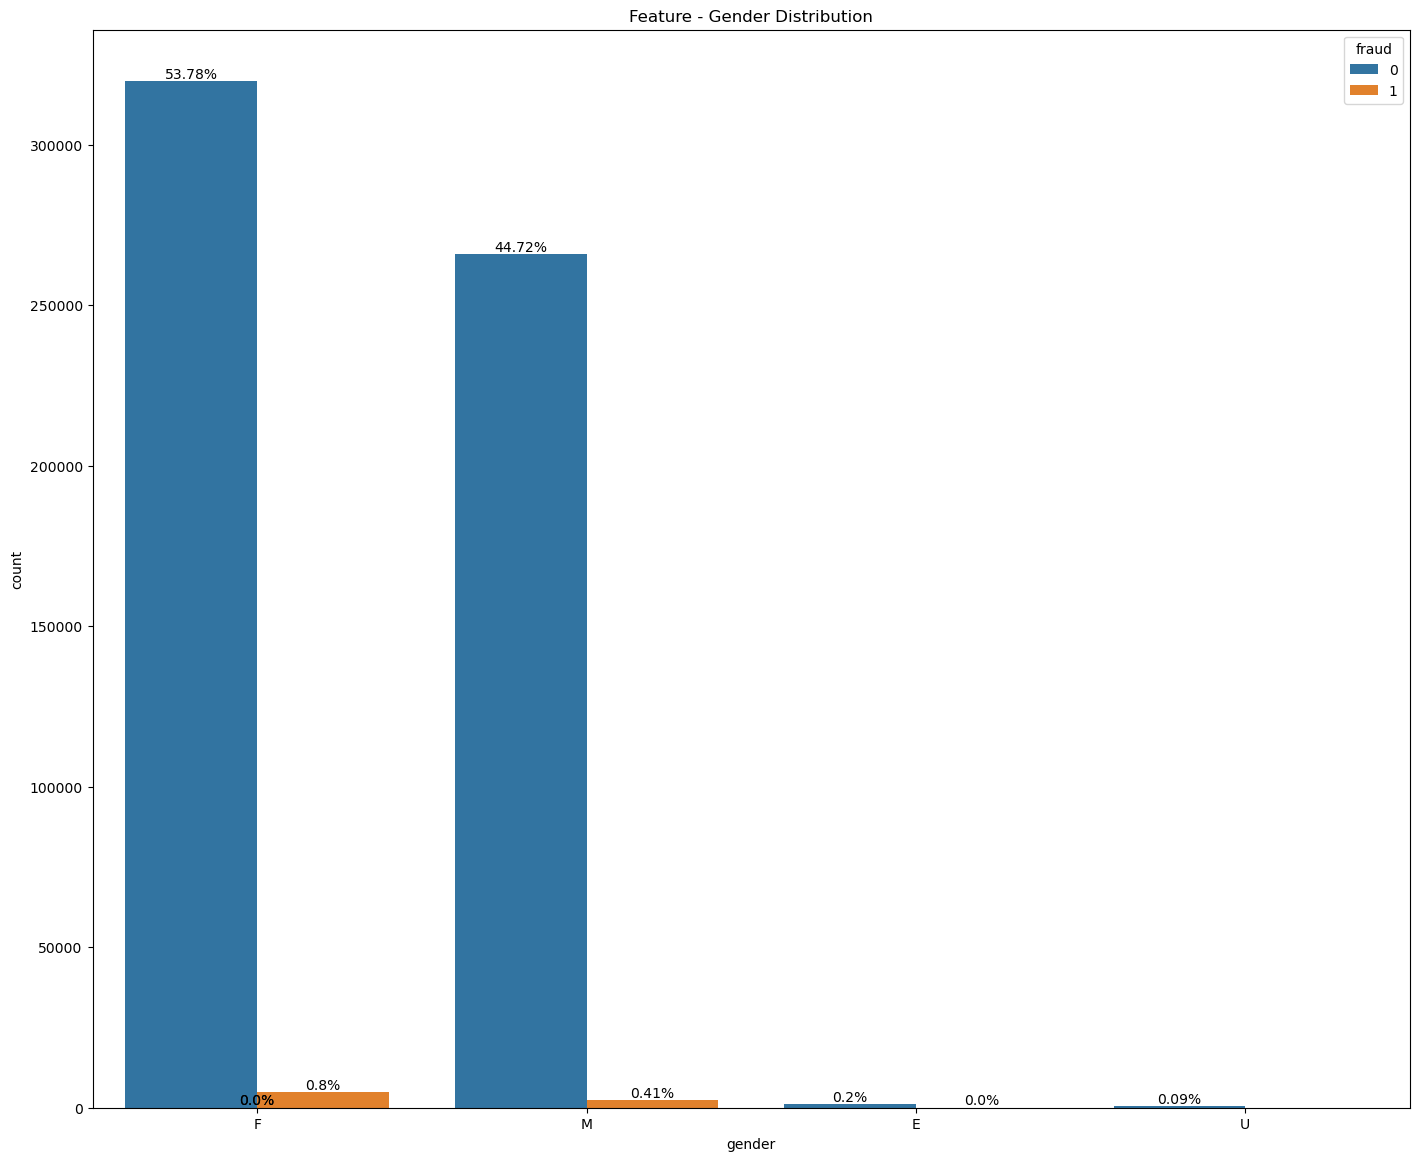

In [16]:
edaplot(df, 'gender', title = 'Feature - Gender Distribution', hue = 'fraud')

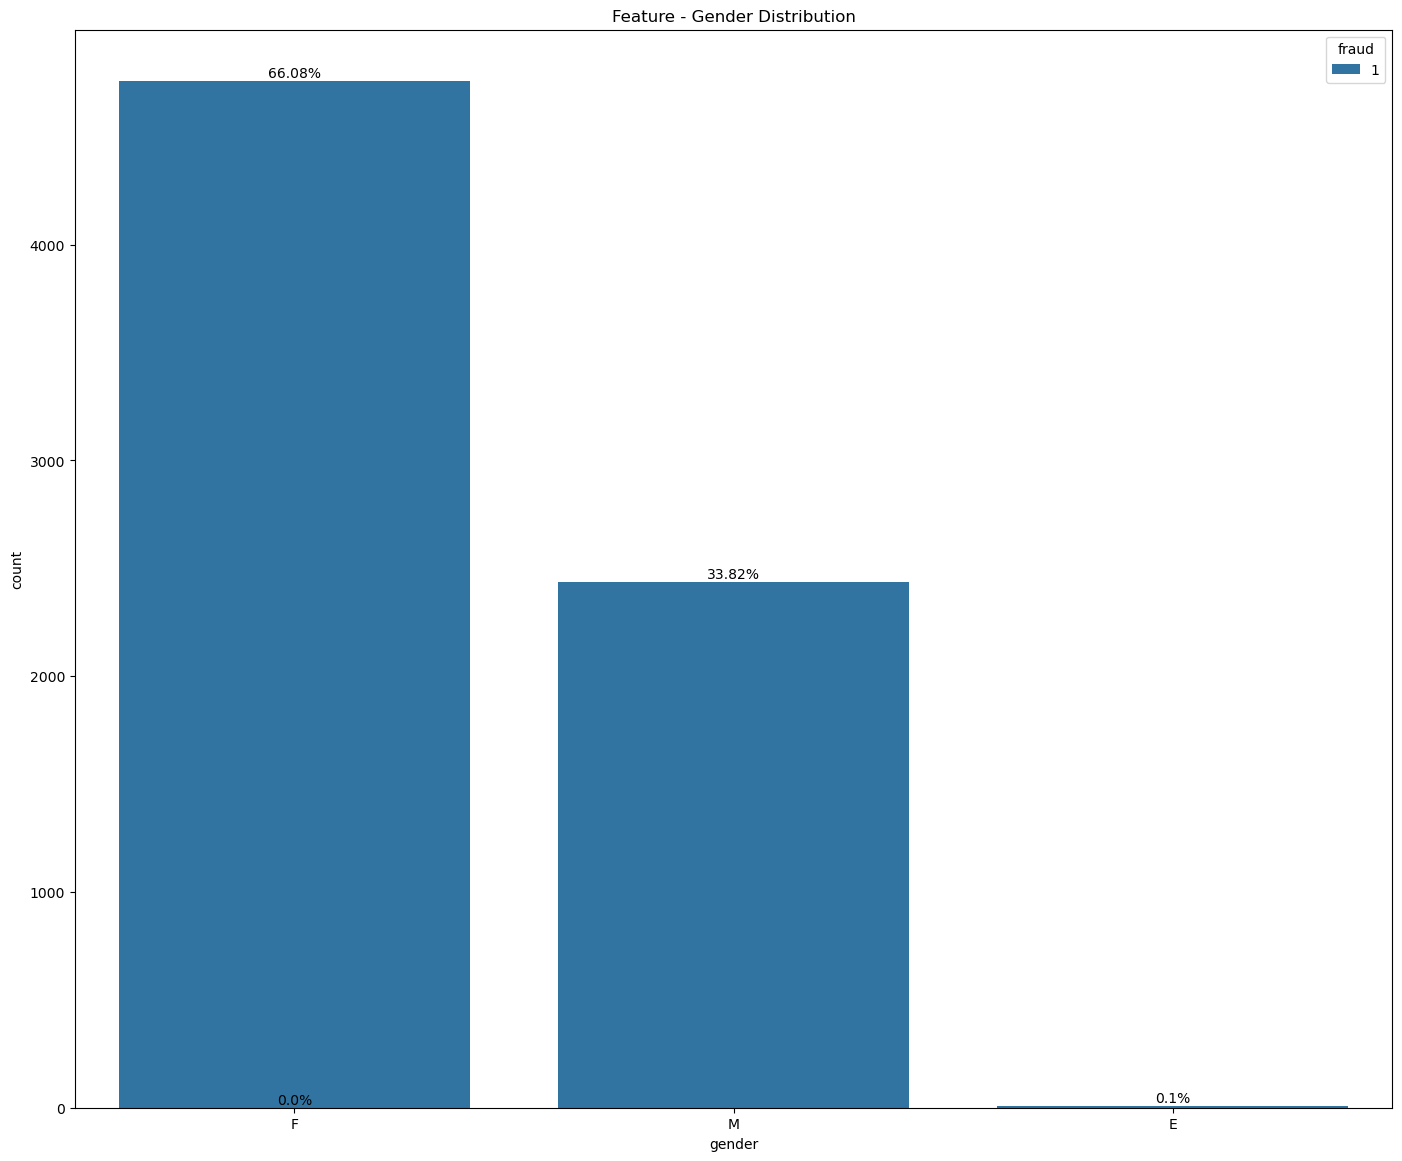

In [17]:
edaplot(df_fraud, 'gender', title = 'Feature - Gender Distribution', hue = 'fraud')

In [18]:
print(df['category'].unique())

['es_transportation' 'es_health' 'es_otherservices' 'es_food'
 'es_hotelservices' 'es_barsandrestaurants' 'es_tech' 'es_sportsandtoys'
 'es_wellnessandbeauty' 'es_hyper' 'es_fashion' 'es_home' 'es_contents'
 'es_travel' 'es_leisure']


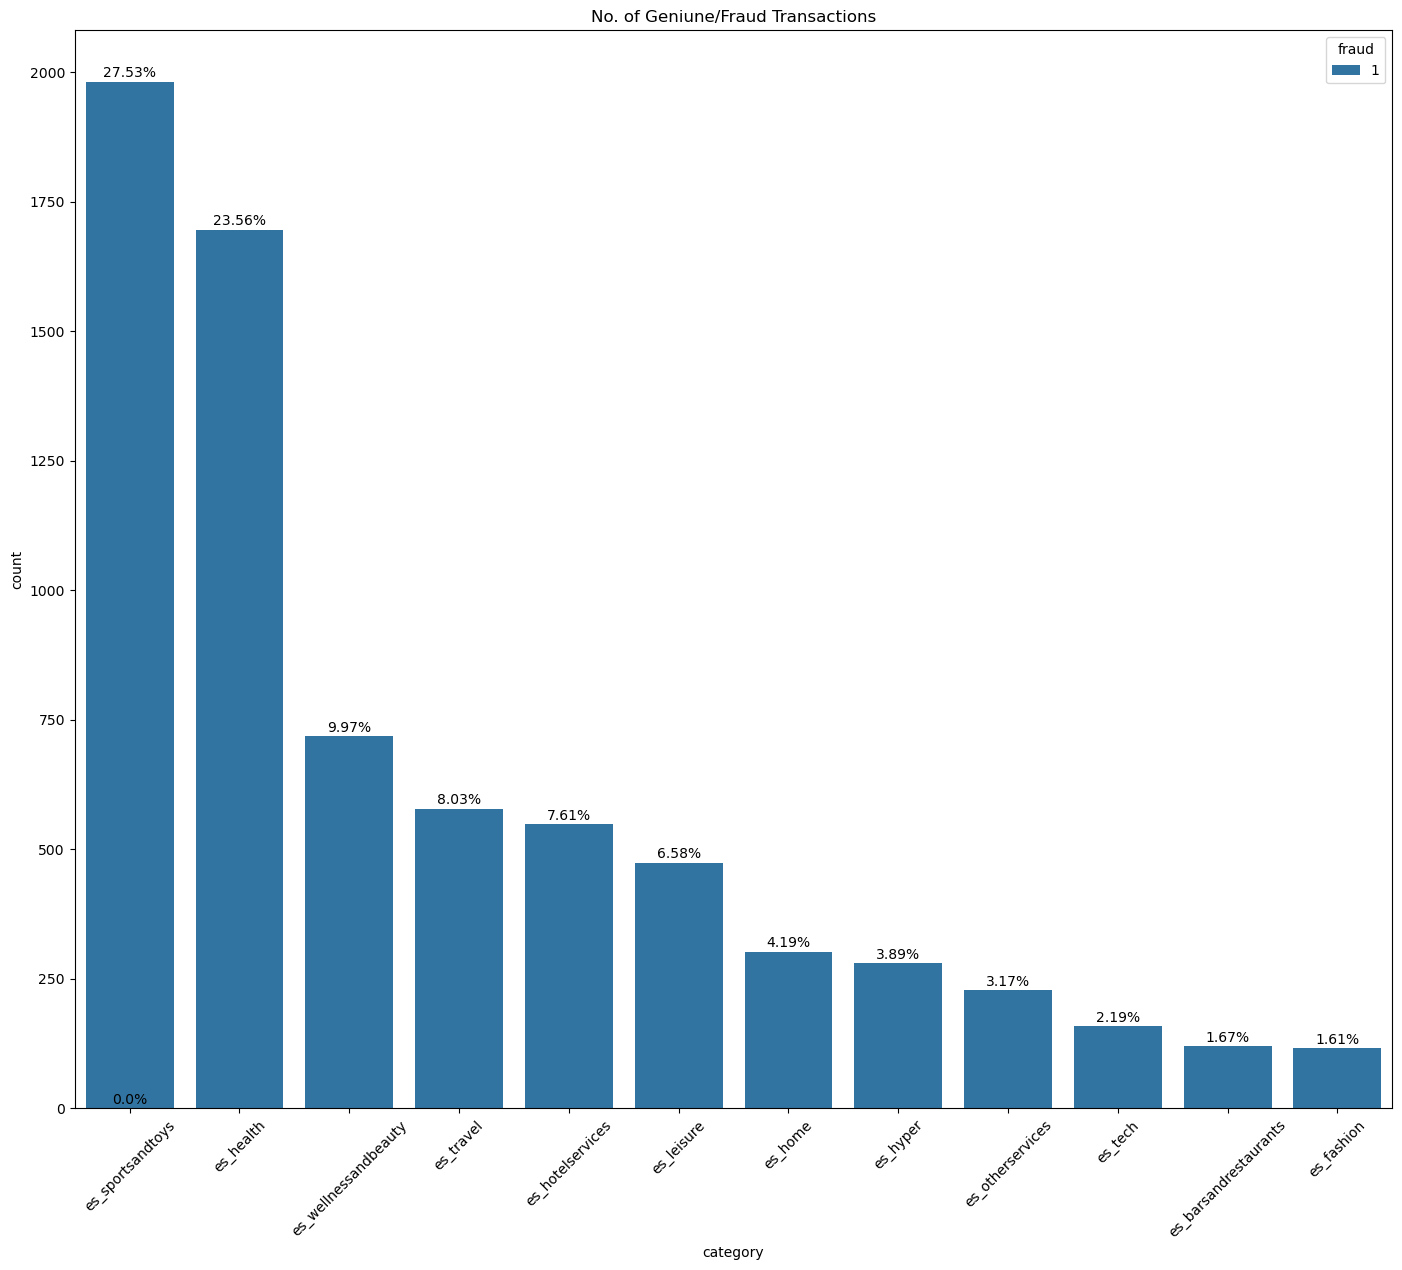

In [19]:
edaplot(df_fraud, 'category', title = 'No. of Geniune/Fraud Transactions', hue = 'fraud', legend=True)

In [20]:
df.groupby('category')['fraud'].mean()

category
es_barsandrestaurants    0.018829
es_contents              0.000000
es_fashion               0.017973
es_food                  0.000000
es_health                0.105126
es_home                  0.152064
es_hotelservices         0.314220
es_hyper                 0.045917
es_leisure               0.949900
es_otherservices         0.250000
es_sportsandtoys         0.495252
es_tech                  0.066667
es_transportation        0.000000
es_travel                0.793956
es_wellnessandbeauty     0.047594
Name: fraud, dtype: float64

C:\Users\anish\AppData\Local\Temp\ipykernel_24168\32945717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\anish\AppData\Local\Temp\ipykernel_24168\32945717.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=hue)


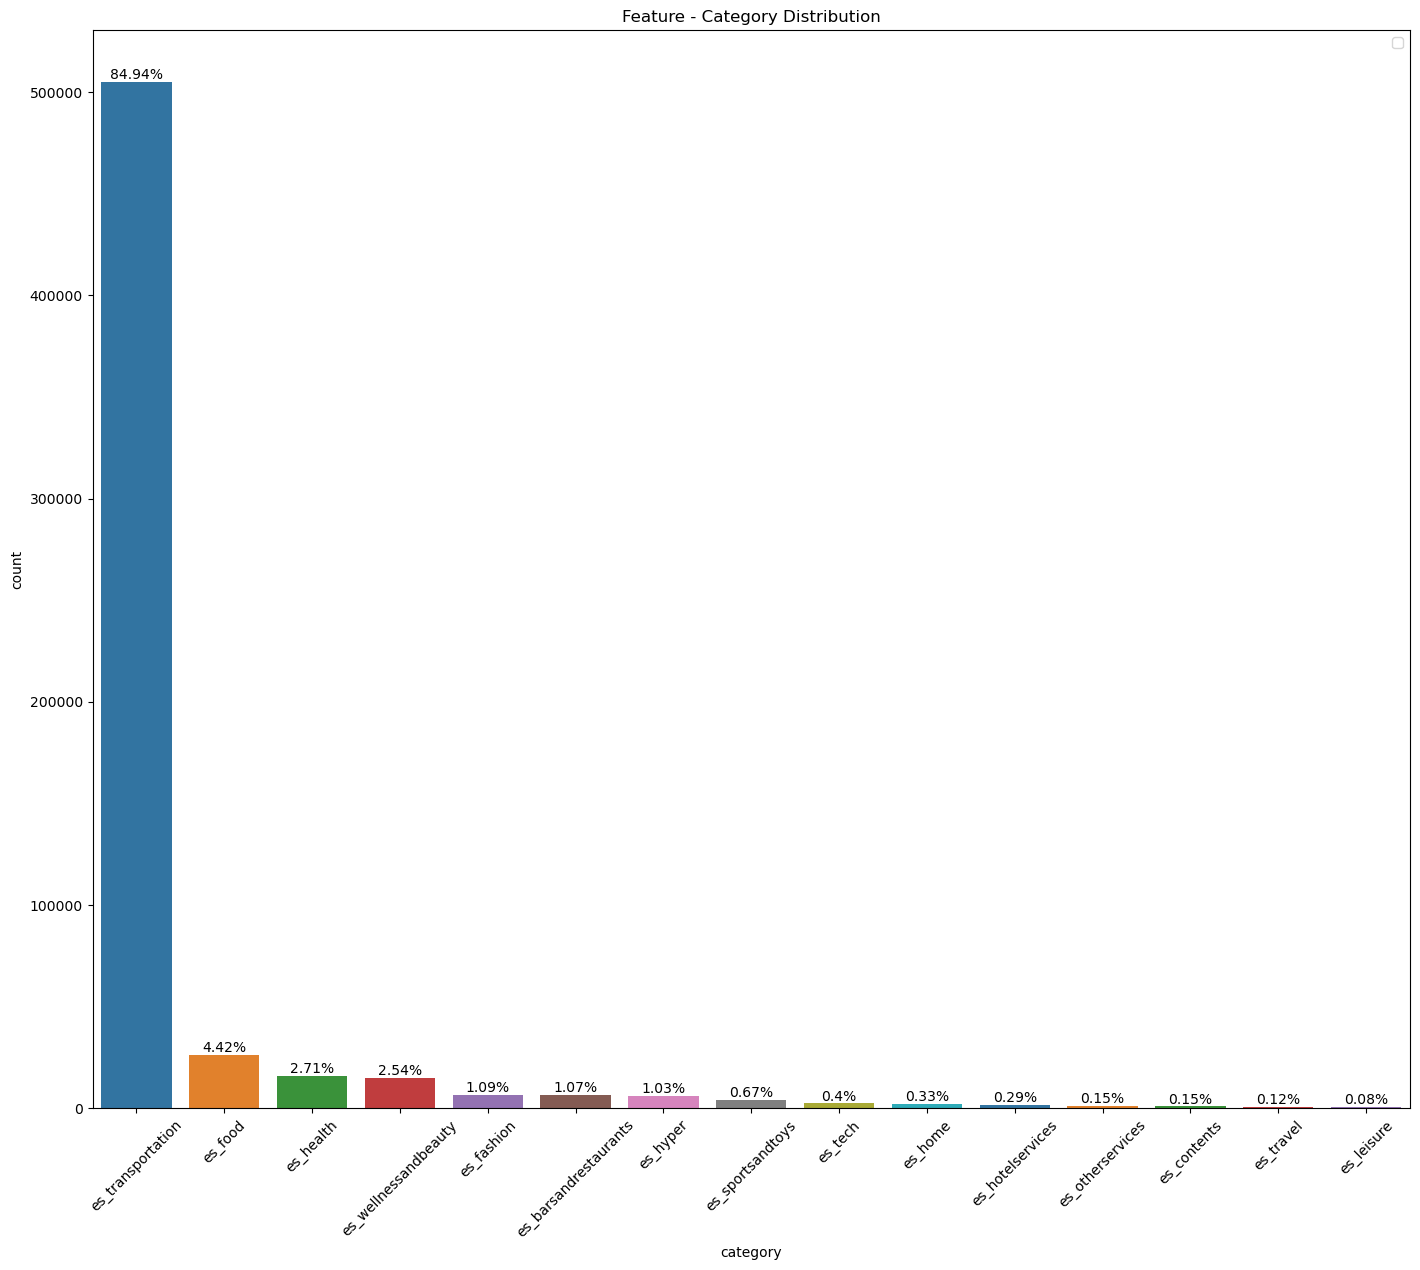

In [21]:
edaplot(df, 'category', title = 'Feature - Category Distribution')

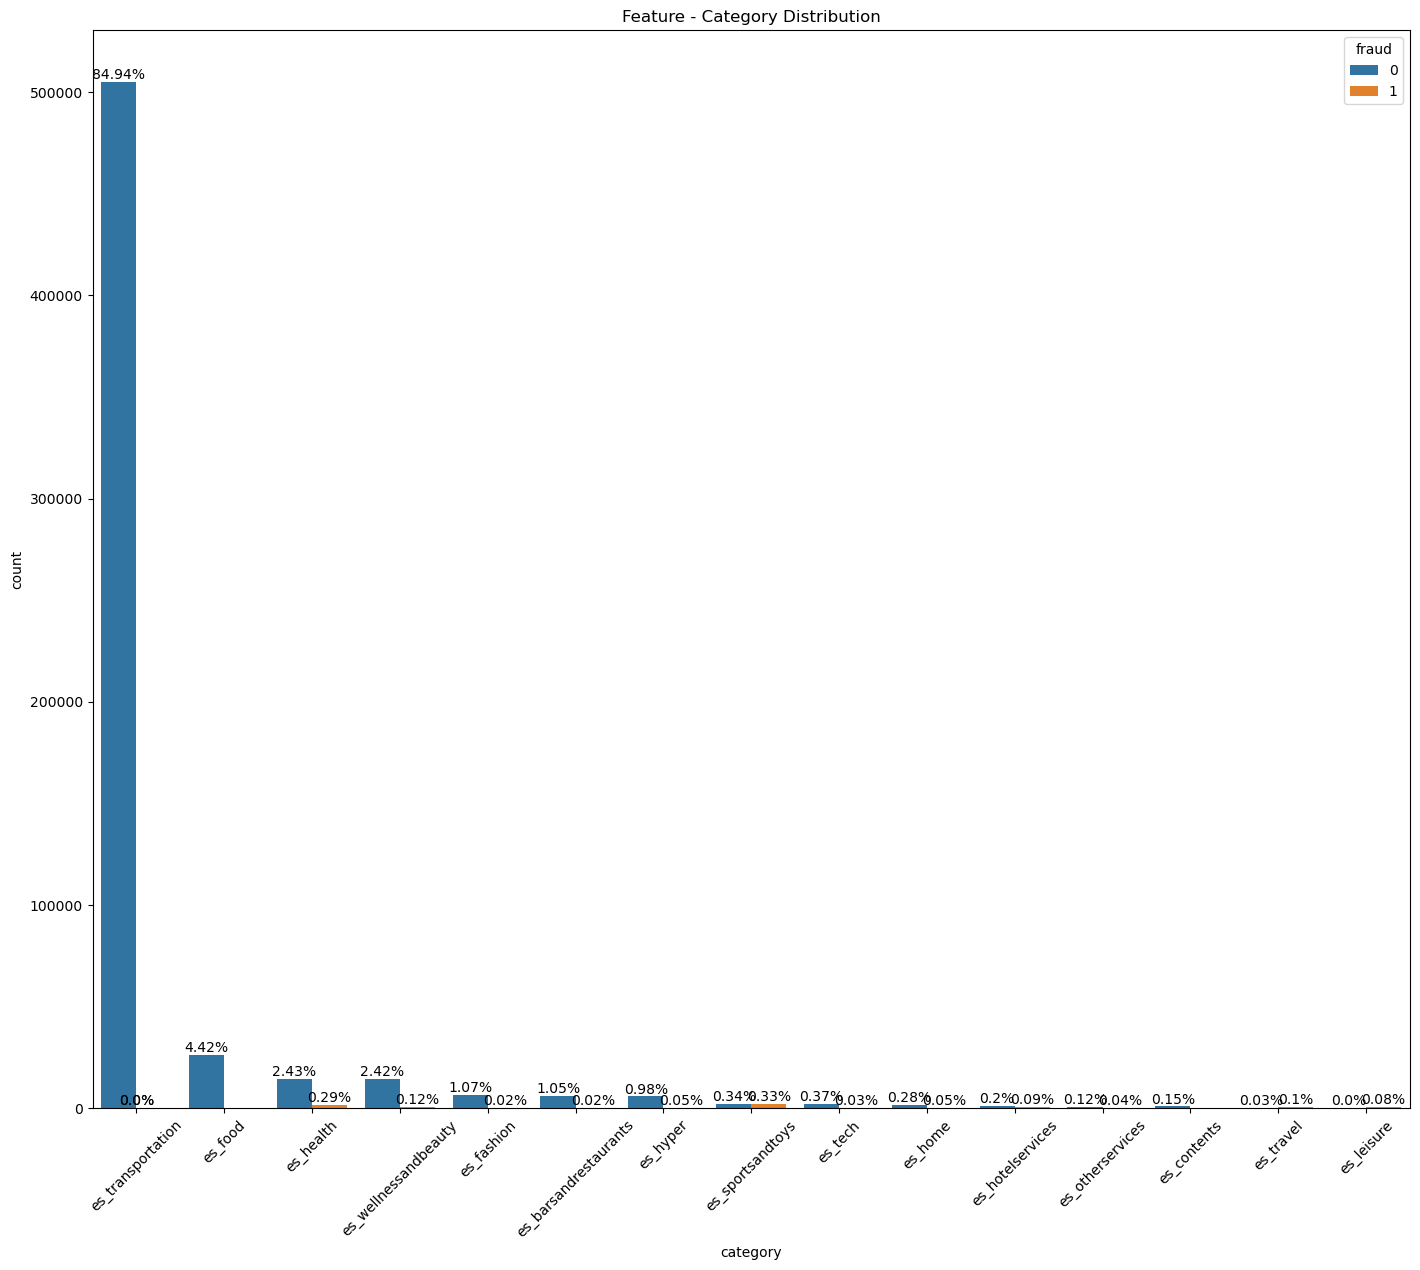

In [22]:
edaplot(df, 'category', title = 'Feature - Category Distribution', hue = 'fraud')

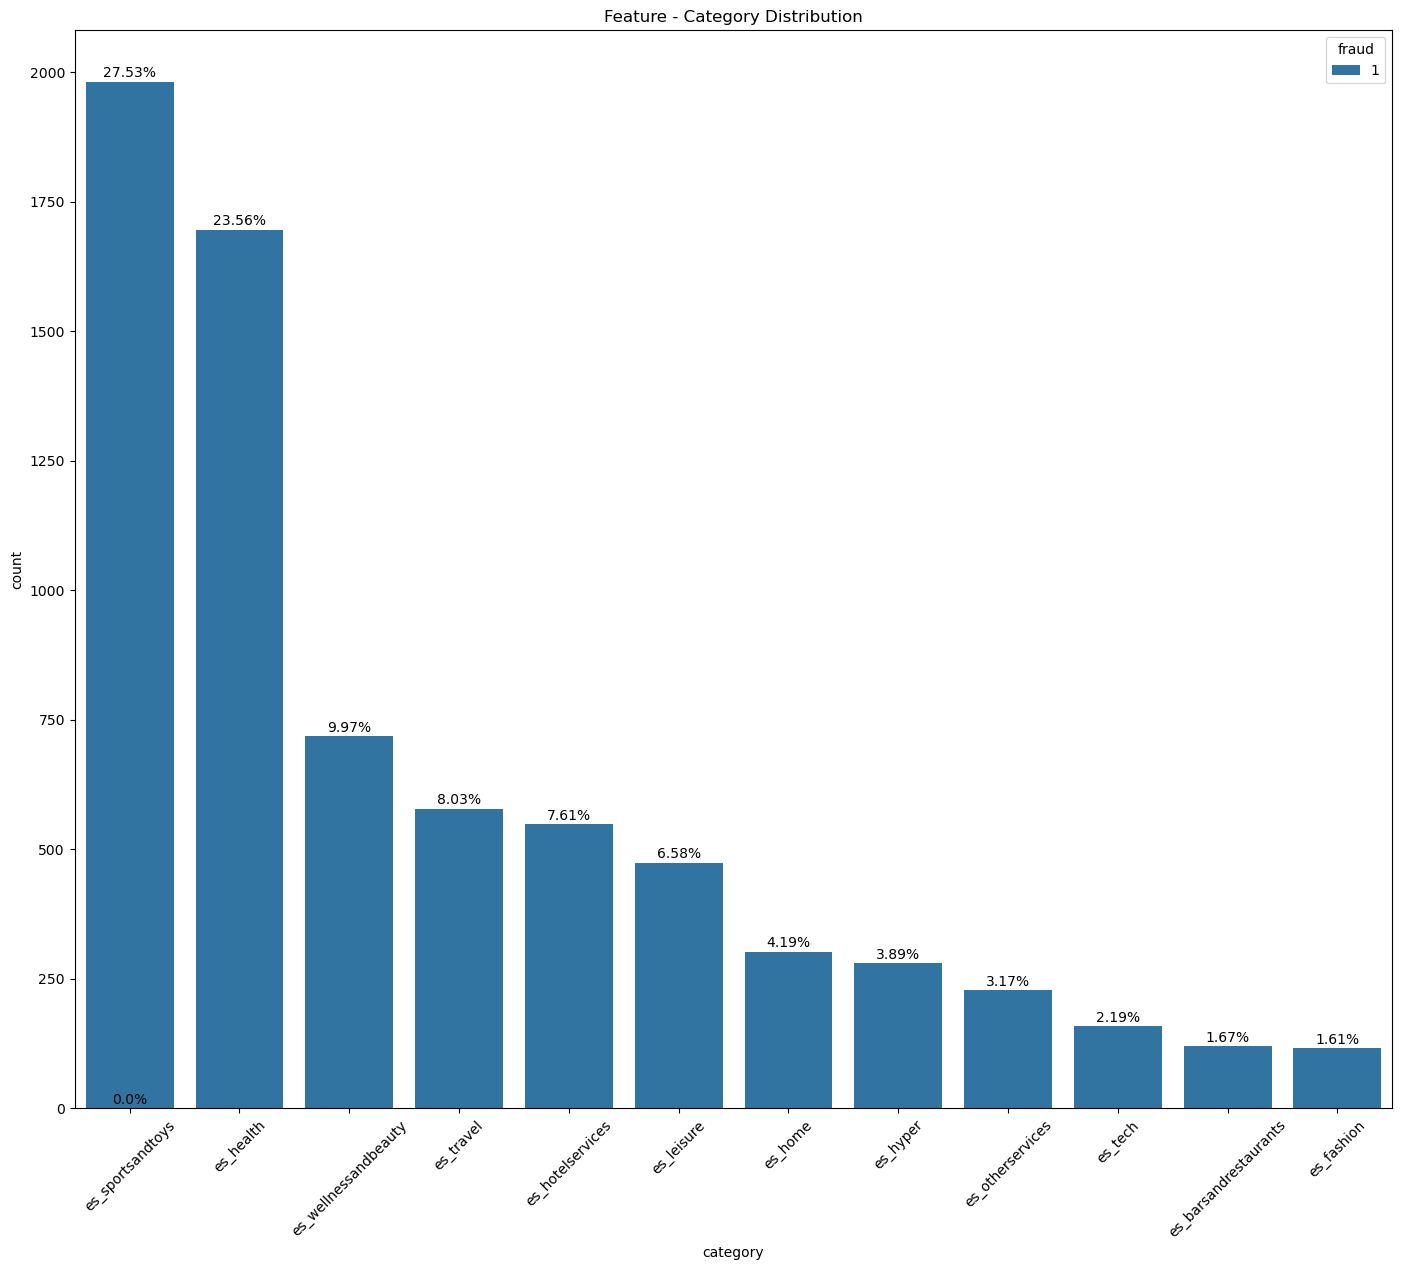

In [23]:
edaplot(df_fraud, 'category', title = 'Feature - Category Distribution', hue = 'fraud')

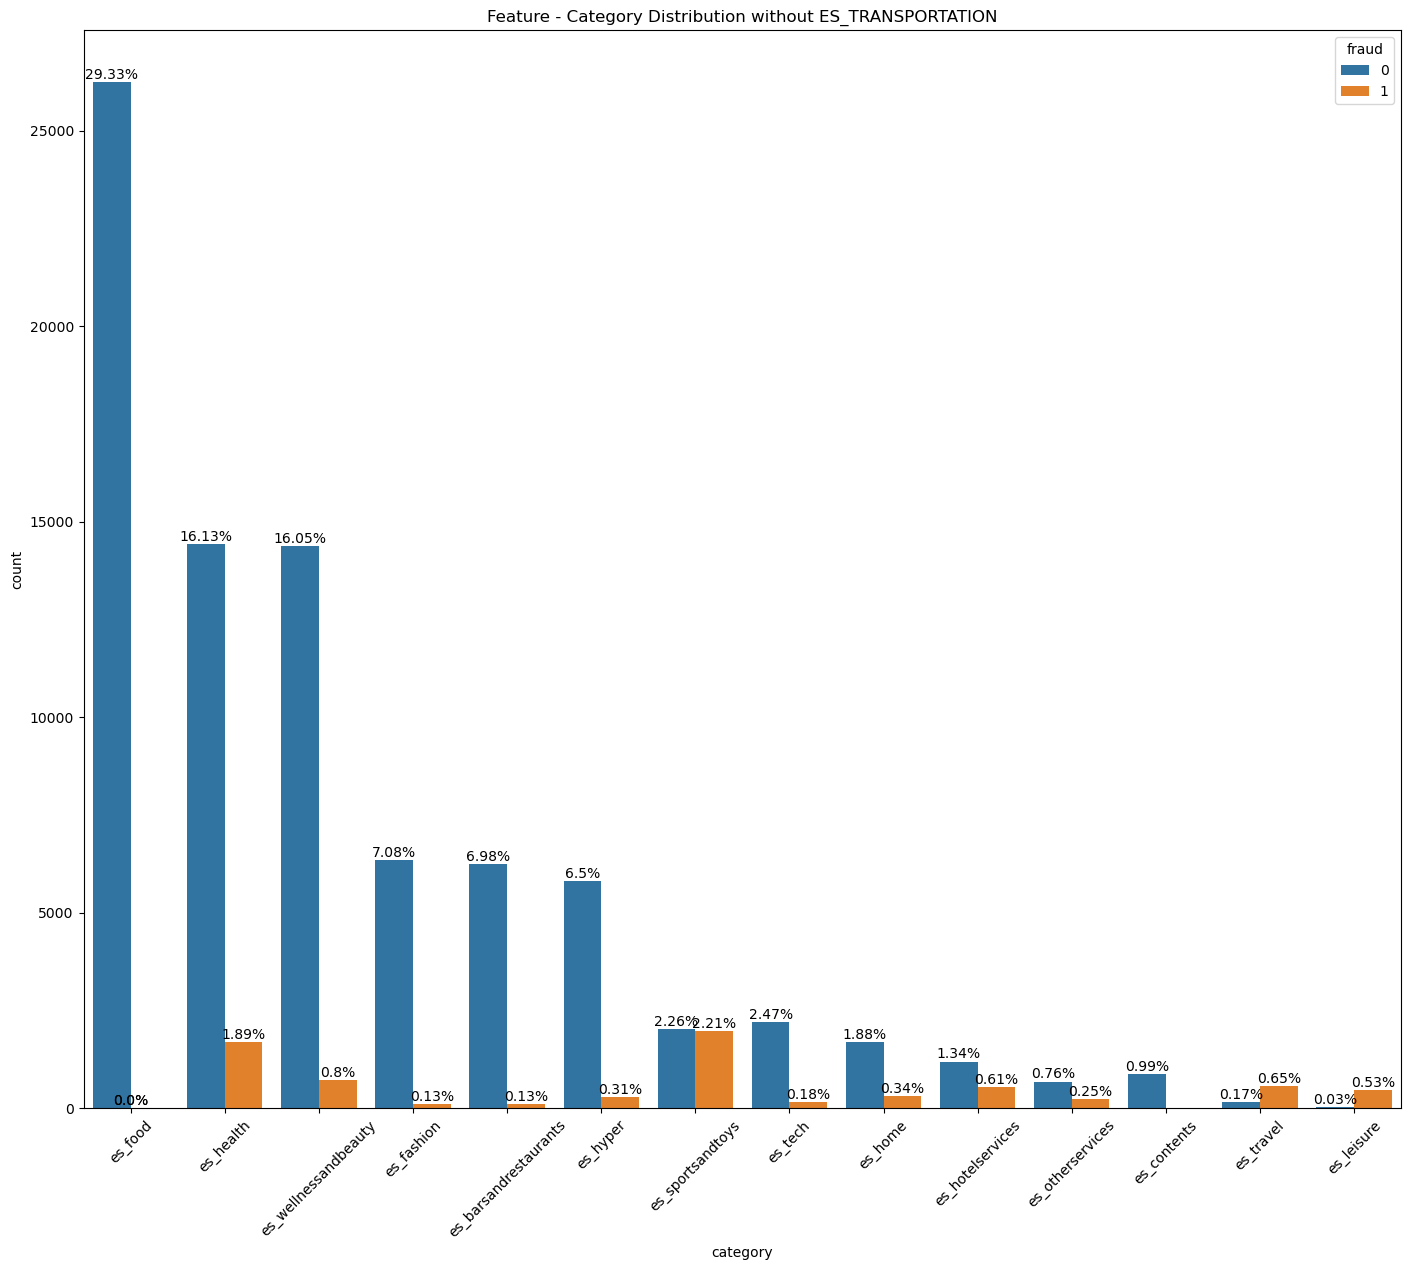

In [24]:
temp = df[df['category'] != 'es_transportation']
edaplot(temp, 'category', title = 'Feature - Category Distribution without ES_TRANSPORTATION', hue = 'fraud')

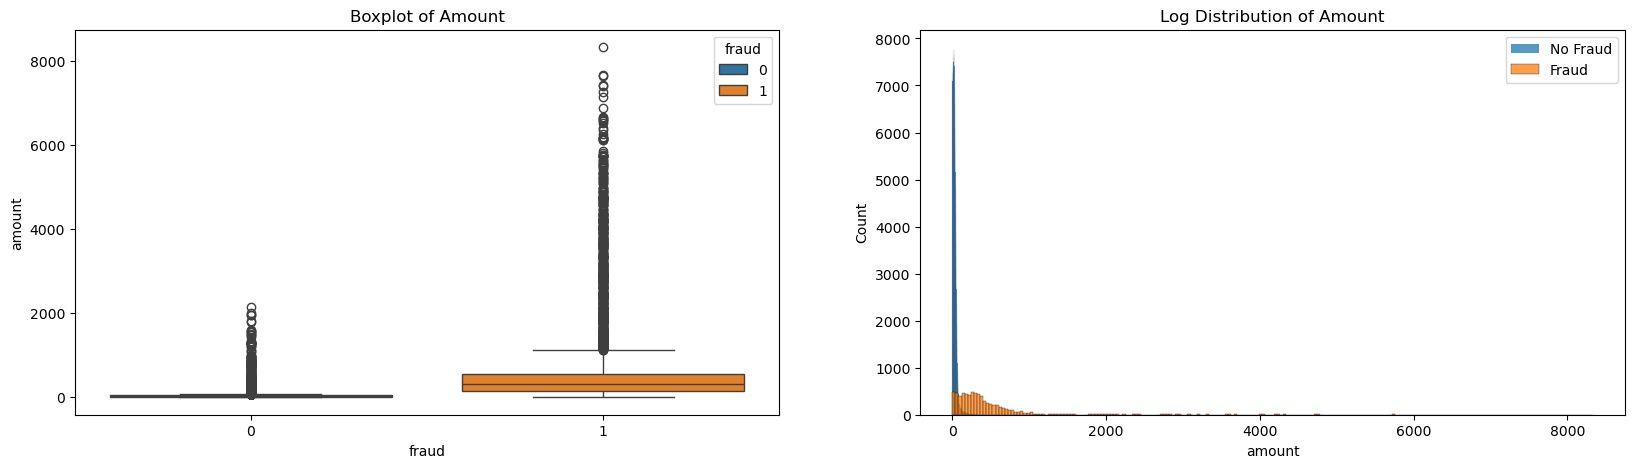

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
ax1.set_title('Boxplot of Amount')
sns.boxplot(data = df, x = 'fraud', y = 'amount', hue = 'fraud', ax = ax1)

ax2.set_title('Log Distribution of Amount')
sns.histplot(df[df['fraud'] == 0]['amount'], label = 'No Fraud', ax = ax2)
sns.histplot(df[df['fraud'] == 1]['amount'], label = 'Fraud', ax = ax2)
ax2.legend()
plt.show()

In [26]:
print('Fraudulent Transaction:')
print(f"Maximun amount of transaction: {df[df['fraud'] == 1]['amount'].max()}")
print(f"Minimum amount of transaction: {df[df['fraud'] == 1]['amount'].min()}")
print(f"Amount amount of transaction: {df[df['fraud'] == 1]['amount'].mean()}")

print('\nNon-Fraudulent Transaction:')
print(f"Maximun amount of transaction: {df[df['fraud'] == 0]['amount'].max()}")
print(f"Minimum amount of transaction: {df[df['fraud'] == 0]['amount'].min()}")
print(f"Amount amount of transaction: {df[df['fraud'] == 0]['amount'].mean()}")

Fraudulent Transaction:
Maximun amount of transaction: 8329.96
Minimum amount of transaction: 0.03
Amount amount of transaction: 530.9265513888889

Non-Fraudulent Transaction:
Maximun amount of transaction: 2144.86
Minimum amount of transaction: 0.0
Amount amount of transaction: 31.847230386607713


In [27]:
new_df = df.copy()
#Frequency Encoding customer and merchant features
for col in ['customer', 'merchant']:
    print(f"Frequency Encoding: {col} - {df[col].nunique()}")
    freq = df[col].value_counts()
    df[col] = df[col].apply(lambda x: freq[x])

Frequency Encoding: customer - 4112
Frequency Encoding: merchant - 50


In [28]:
from sklearn.preprocessing import LabelEncoder

for col in ['gender', 'age', 'category']:
    print(f"Label Encoding: {col} - {df[col].nunique()}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

Label Encoding: gender - 4
Label Encoding: age - 8
Label Encoding: category - 15


In [29]:
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,167,4,2,205426,12,4.55,0
1,0,169,2,2,205426,12,39.68,0
2,0,65,4,1,299693,12,26.89,0
3,0,171,3,2,205426,12,17.25,0
4,0,145,5,2,205426,12,35.72,0


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

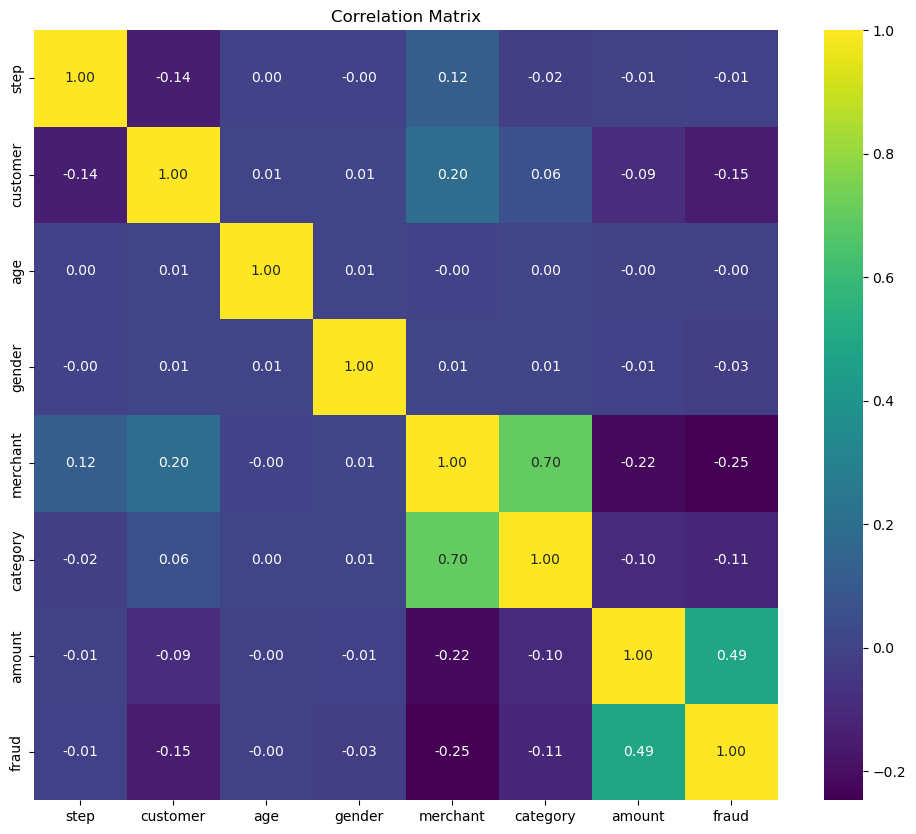

In [31]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [32]:
X = df.drop(['fraud'], axis = 1)
y = df['fraud']
print(X.head())
print("\n\n", y.head())

   step  customer  age  gender  merchant  category  amount
0     0       167    4       2    205426        12    4.55
1     0       169    2       2    205426        12   39.68
2     0        65    4       1    299693        12   26.89
3     0       171    3       2    205426        12   17.25
4     0       145    5       2    205426        12   35.72


 0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


In [33]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

y_copy = y.copy()
# Computing class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

# Creating a dictionary to map class labels to their computed weights
class_weight_dict = dict(zip(np.unique(y), class_weights))

class_weight_dict

{0: 0.5061282541455085, 1: 41.29465277777778}

In [34]:
from sklearn.model_selection import train_test_split

# First split data into temp_train and test sets (70% / 30%)
X_temp_train, X_test, y_temp_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Then split temp_train into train and validation sets (80% / 20% of temp_train)
# This gives approximately 56% train, 14% validation, 30% test of the original data
X_train, X_cv, y_train, y_cv = train_test_split(X_temp_train, y_temp_train, test_size=0.20, random_state=42)

# Print the shapes to verify the split
print(f"Original data shape: {X.shape}")
print(f"Train set shape: {X_train.shape} - {X_train.shape[0]/X.shape[0]:.2%} of original data")
print(f"Validation set shape: {X_cv.shape} - {X_cv.shape[0]/X.shape[0]:.2%} of original data")
print(f"Test set shape: {X_test.shape} - {X_test.shape[0]/X.shape[0]:.2%} of original data")

Original data shape: (594643, 7)
Train set shape: (333000, 7) - 56.00% of original data
Validation set shape: (83250, 7) - 14.00% of original data
Test set shape: (178393, 7) - 30.00% of original data


Class distribution before SMOTE:
Training set - Class 0: 328949, Class 1: 4051, Ratio: 1:81.20
Validation set - Class 0: 82217, Class 1: 1033, Ratio: 1:79.59
Test set - Class 0: 176277, Class 1: 2116, Ratio: 1:83.31

Class distribution after SMOTE:
Training set - Class 0: 328949, Class 1: 328949, Ratio: 1:1.00
Validation set - Class 0: 82217, Class 1: 82217, Ratio: 1:1.00


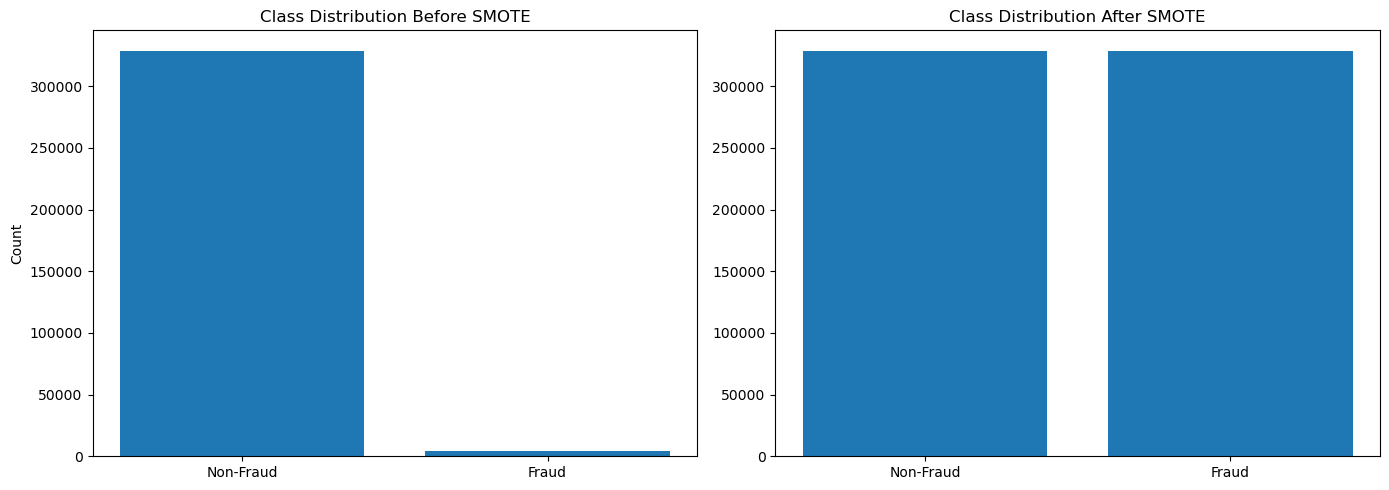


Original training data shape: (333000, 7)
Balanced training data shape: (657898, 7)


In [35]:
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(f"Training set - Class 0: {sum(y_train == 0)}, Class 1: {sum(y_train == 1)}, Ratio: 1:{sum(y_train == 0)/sum(y_train == 1):.2f}")
print(f"Validation set - Class 0: {sum(y_cv == 0)}, Class 1: {sum(y_cv == 1)}, Ratio: 1:{sum(y_cv == 0)/sum(y_cv == 1):.2f}")
print(f"Test set - Class 0: {sum(y_test == 0)}, Class 1: {sum(y_test == 1)}, Ratio: 1:{sum(y_test == 0)/sum(y_test == 1):.2f}")

# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Apply SMOTE to validation set (optional, depending on your needs)
X_cv_sm, y_cv_sm = smote.fit_resample(X_cv, y_cv)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(f"Training set - Class 0: {sum(y_train_sm == 0)}, Class 1: {sum(y_train_sm == 1)}, Ratio: 1:{sum(y_train_sm == 0)/sum(y_train_sm == 1):.2f}")
print(f"Validation set - Class 0: {sum(y_cv_sm == 0)}, Class 1: {sum(y_cv_sm == 1)}, Ratio: 1:{sum(y_cv_sm == 0)/sum(y_cv_sm == 1):.2f}")

# Visualize class distribution before and after SMOTE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Before SMOTE
ax1.bar(['Non-Fraud', 'Fraud'], [sum(y_train == 0), sum(y_train == 1)])
ax1.set_title('Class Distribution Before SMOTE')
ax1.set_ylabel('Count')

# After SMOTE
ax2.bar(['Non-Fraud', 'Fraud'], [sum(y_train_sm == 0), sum(y_train_sm == 1)])
ax2.set_title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()

print(f"\nOriginal training data shape: {X_train.shape}")
print(f"Balanced training data shape: {X_train_sm.shape}")

In [38]:
# --- New cell: import model & prepare sequences ---
import sys
sys.path.append(r'c:\Users\anish\Desktop\Big Data\anomaly_transformer_pytorch')
from model import AnomalyTransformer
import torch
from torch.utils.data import DataLoader
import numpy as np

# hyper‐parameters
seq_len    = 30
batch_size = 64
epochs     = 10
lr         = 1e-4
lambda_    = 0.1      # association discrepancy weight
n_layers   = 2
d_model    = X_train_sm.shape[1]
device     = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# helper to build sliding windows
def make_sequences(df, L):
    A = df.values.astype(np.float32)
    return torch.stack([torch.from_numpy(A[i:i+L]) 
                        for i in range(len(A) - L + 1)])

# Create sequences for training, validation, and testing
train_seq = make_sequences(X_train_sm, seq_len)
cv_seq = make_sequences(X_cv_sm, seq_len)
test_seq = make_sequences(X_test, seq_len)  # FIX: Use X_test instead of y_train_sm

print(f"Training sequences shape: {train_seq.shape}")
print(f"Validation sequences shape: {cv_seq.shape}")
print(f"Test sequences shape: {test_seq.shape}")

train_loader = DataLoader(train_seq, batch_size=batch_size, shuffle=True)

# --- instantiate model, optimizer ---
model     = AnomalyTransformer(N=seq_len, d_model=d_model, layers=n_layers, lambda_=lambda_).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# --- training loop: alternate max‐step and min‐step per epoch ---
for epoch in range(1, epochs+1):
    model.train()
    max_loss_acc = 0.0
    min_loss_acc = 0.0

    # MAX step (maximize association discrepancy)
    for batch in train_loader:
        x = batch.to(device)
        optimizer.zero_grad()
        _ = model(x)                       # forward populates P_layers & S_layers
        loss_max = model.max_loss(x)
        (-loss_max).backward()             # maximize
        optimizer.step()
        max_loss_acc += loss_max.item()

    # MIN step (minimize reconstruction minus discrepancy)
    for batch in train_loader:
        x = batch.to(device)
        optimizer.zero_grad()
        _ = model(x)
        loss_min = model.min_loss(x)
        loss_min.backward()
        optimizer.step()
        min_loss_acc += loss_min.item()

    print(f"Epoch {epoch}: max_loss={max_loss_acc/len(train_loader):.4f} "
          f"min_loss={min_loss_acc/len(train_loader):.4f}")

# --- evaluation: compute anomaly scores on test set ---
model.eval()
scores = []

# Create test sequences from X_test, not y_train_sm
test_seq = make_sequences(X_test, seq_len)
print(f"Test sequences shape: {test_seq.shape}")

with torch.no_grad():
    # Process test_seq in batches to avoid memory issues
    test_loader = DataLoader(test_seq, batch_size=batch_size, shuffle=False)
    for batch in test_loader:
        x = batch.to(device)
        _ = model(x)
        # Get anomaly scores - reshape to match batch size
        sc = model.anomaly_score(x).cpu().numpy()
        scores.append(sc)

# Flatten into one array of scores 
anomaly_scores = np.concatenate(scores)
print("Computed anomaly scores on test set:", anomaly_scores.shape)

Training sequences shape: torch.Size([657869, 30, 7])
Validation sequences shape: torch.Size([164405, 30, 7])
Test sequences shape: torch.Size([178364, 30, 7])
Epoch 1: max_loss=411.7594 min_loss=684431.4360
Epoch 2: max_loss=408.2898 min_loss=684390.9660
Epoch 3: max_loss=408.2852 min_loss=684397.0309
Epoch 4: max_loss=408.8574 min_loss=684413.6445
Epoch 5: max_loss=408.7013 min_loss=684369.6087
Epoch 6: max_loss=408.7038 min_loss=684353.8029
Epoch 7: max_loss=408.7932 min_loss=684343.7721
Epoch 8: max_loss=408.9840 min_loss=684324.4772
Epoch 9: max_loss=409.0460 min_loss=684293.6491
Epoch 10: max_loss=409.0689 min_loss=684275.5244
Test sequences shape: torch.Size([178364, 30, 7])
Computed anomaly scores on test set: (178364, 30)


In [39]:
import torch
import os # Import the os module

# Define the directory where you want to save the model
save_dir = r'C:\Users\anish\Desktop\Big Data' 
# Define the filename for the saved model
filename = 'anomaly_transformer_model.pth'
# Combine directory and filename into a full path
save_path = os.path.join(save_dir, filename)

# Ensure the directory exists (optional, but good practice)
os.makedirs(save_dir, exist_ok=True) 

# Save the model's state dictionary
torch.save(model.state_dict(), save_path)

print(f"Model state dictionary saved to {save_path}")

Model state dictionary saved to C:\Users\anish\Desktop\Big Data\anomaly_transformer_model.pth


In [44]:
# Load the state dictionary into the model
model.load_state_dict(torch.load('C:/Users/anish/Desktop/Big Data/smote_fraud_detection_name.h5'))
model.eval()
print("Model loaded successfully!")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/anish/Desktop/Big Data/smote_fraud_detection_name.h5'

Generated scores shape: (178364,)
Aligned scores shape: (178364,)
Aligned labels shape: (178364,)


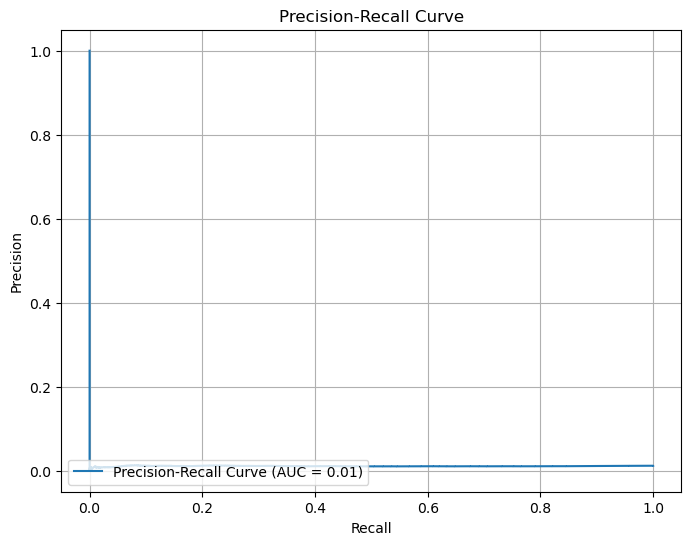

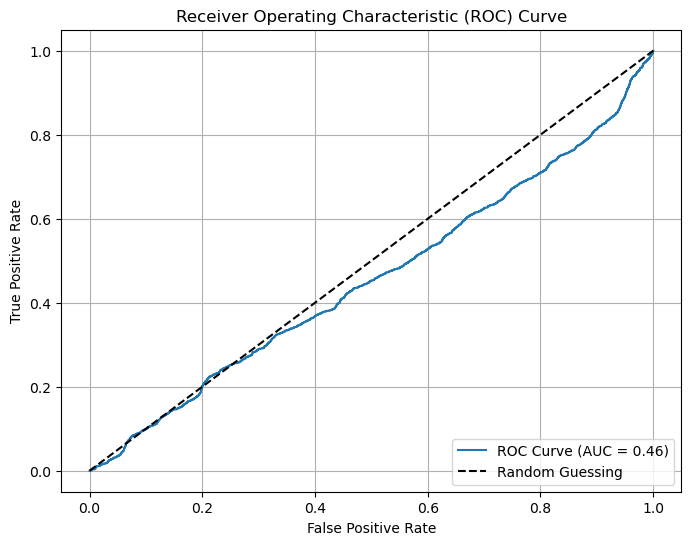

ROC AUC Score: 0.4569
Precision-Recall AUC Score: 0.0109

Best Threshold (based on max F1): 34318.3750
Best F1 Score: 0.0237
Precision at best threshold: 0.0125
Recall at best threshold: 0.2236

Classification Report:
               precision    recall  f1-score   support

Non-Fraud (0)       0.99      0.79      0.88    176249
    Fraud (1)       0.01      0.22      0.02      2115

     accuracy                           0.78    178364
    macro avg       0.50      0.51      0.45    178364
 weighted avg       0.98      0.78      0.87    178364


Confusion Matrix:
                  Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud               138885            37364
Actual Fraud                     1642              473


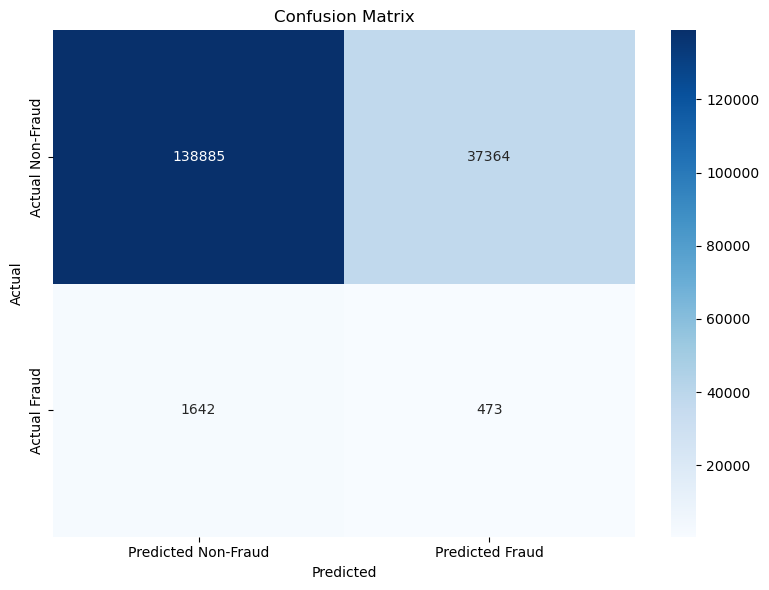

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix
import pandas as pd

# --- Re-calculate scores per sequence ---
model.eval()
sequence_scores = []

with torch.no_grad():
    # Make sure we're using the test sequences created from X_test
    test_loader_eval = DataLoader(test_seq, batch_size=batch_size*2)
    for batch in test_loader_eval:
        x = batch.to(device)
        _ = model(x)  # Forward pass to populate internal states
        # Get max score across sequence dimension for each sequence
        sc = model.anomaly_score(x).max(dim=1)[0]
        sequence_scores.append(sc.cpu().numpy())

# Concatenate scores from all batches
sequence_scores = np.concatenate(sequence_scores)
print(f"Generated scores shape: {sequence_scores.shape}")

# --- Correctly align scores with test labels ---
# Convert y_test to numpy for easier manipulation
y_test_np = y_test.to_numpy()

# The important thing is to understand the alignment between sequences and labels
# Each sequence is created from X_test[i:i+seq_len]
# We need to match each sequence with the corresponding label

# Option 1: Use the label of the last point in each sequence
# This creates aligned_labels with length = len(X_test) - seq_len + 1
aligned_labels = y_test_np[seq_len-1:] 

# Ensure scores and labels have the same length
if len(sequence_scores) != len(aligned_labels):
    print(f"Warning: Mismatch in length. Scores: {len(sequence_scores)}, Labels: {len(aligned_labels)}")
    min_len = min(len(sequence_scores), len(aligned_labels))
    sequence_scores = sequence_scores[:min_len]
    aligned_labels = aligned_labels[:min_len]

print(f"Aligned scores shape: {sequence_scores.shape}")
print(f"Aligned labels shape: {aligned_labels.shape}")

# --- Calculate Precision-Recall Curve ---
precision, recall, thresholds_pr = precision_recall_curve(aligned_labels, sequence_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# --- Calculate ROC Curve ---
fpr, tpr, thresholds_roc = roc_curve(aligned_labels, sequence_scores)
roc_auc = roc_auc_score(aligned_labels, sequence_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

# --- Find optimal threshold using F1 score ---
f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)
best_threshold_idx = np.argmax(f1_scores[:-1])  # Exclude last point
best_threshold = thresholds_pr[best_threshold_idx]
best_f1 = f1_scores[best_threshold_idx]

print(f"\nBest Threshold (based on max F1): {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")
print(f"Precision at best threshold: {precision[best_threshold_idx]:.4f}")
print(f"Recall at best threshold: {recall[best_threshold_idx]:.4f}")

# --- Apply threshold and evaluate ---
predictions = (sequence_scores >= best_threshold).astype(int)

print("\nClassification Report:")
print(classification_report(aligned_labels, predictions, target_names=['Non-Fraud (0)', 'Fraud (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(aligned_labels, predictions)
print(pd.DataFrame(cm, 
                  index=['Actual Non-Fraud', 'Actual Fraud'], 
                  columns=['Predicted Non-Fraud', 'Predicted Fraud']))

# --- Visualize confusion matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()